In [24]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [25]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris['species'] = df_iris['species'].apply(lambda x: iris.target_names[x])

In [26]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df_iris["sepal length (cm)"].dtypes

dtype('float64')

In [29]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.



In [32]:
def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):

#Comprobaciones necesarias para no dar error como consecuencia de los valores de entrada

    # Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.
    if len(columns) == 0:
        columns = df.select_dtypes(include=['float', 'int']).columns.tolist() #modo generico
        #columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'] #modo df_iris
  
    # Comprobar si las columnas existen en el dataframe
    for col in columns:
        if col not in df.columns:
            print(f"Error: La columna '{col}' no existe en el dataframe.")
            return None

    # Si target_col está vacío, igualar a la primera columna numérica continua del dataframe
    if target_col == "":
        target_col = df.select_dtypes(include=['float', 'int']).columns[0]
        #target_col = ['sepal length (cm)'] #modo df_iris

    # Comprobar si umbral_corr es un número válido entre 0 y 1
    if not 0 <= umbral_corr <= 1:
        print("Error: 'umbral_corr' debe ser un número entre 0 y 1.")
        return None

    # Comprobar si pvalue es un número válido entre 0 y 1 
    if pvalue is not None:
        if pvalue > 1 or pvalue < 0:
            print("Error: 'pvalue' debe ser un número entre 0 y 1.")
            return None

    # Comprobar si target_col es una columna numérica continua del dataframe
        if tipifica_variables(df, 0, umbral_corr) != 'Numérica Continua':
            print("Error: 'target_col' debe ser una variable numérica continua del dataframe.")
            return None


#[...] la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que 
#cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el 
#test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores.

    # Crear una lista para almacenar las columnas que cumplen con las condiciones
    valid_columns = []
    
    # Filtrar las columnas que cumplen con el umbral de correlación y el test de p-value si se proporciona
    for col in columns:
        if col != target_col:
            correlation, p_value = pearsonr(df[target_col], df[col])
            if abs(correlation) > umbral_corr and (pvalue is None or p_value < pvalue):
                valid_columns.append(col)
    
    # Si no hay columnas válidas, imprimir mensaje y retornar None
    if len(valid_columns) == 0:
        print("No hay columnas que cumplan los criterios especificados.")
        return None
    
    # Dividir las columnas válidas en grupos de máximo 5 para plotear
    for i in range(0, len(valid_columns), 5):
        subset_columns = valid_columns[i:i+5]
        subset_columns.append(target_col)  # Asegurar que la columna target también está incluida
        sns.pairplot(df[subset_columns], diag_kind='kde', kind='reg', height=3)
        plt.show()
    
    return valid_columns

## Ejemplo

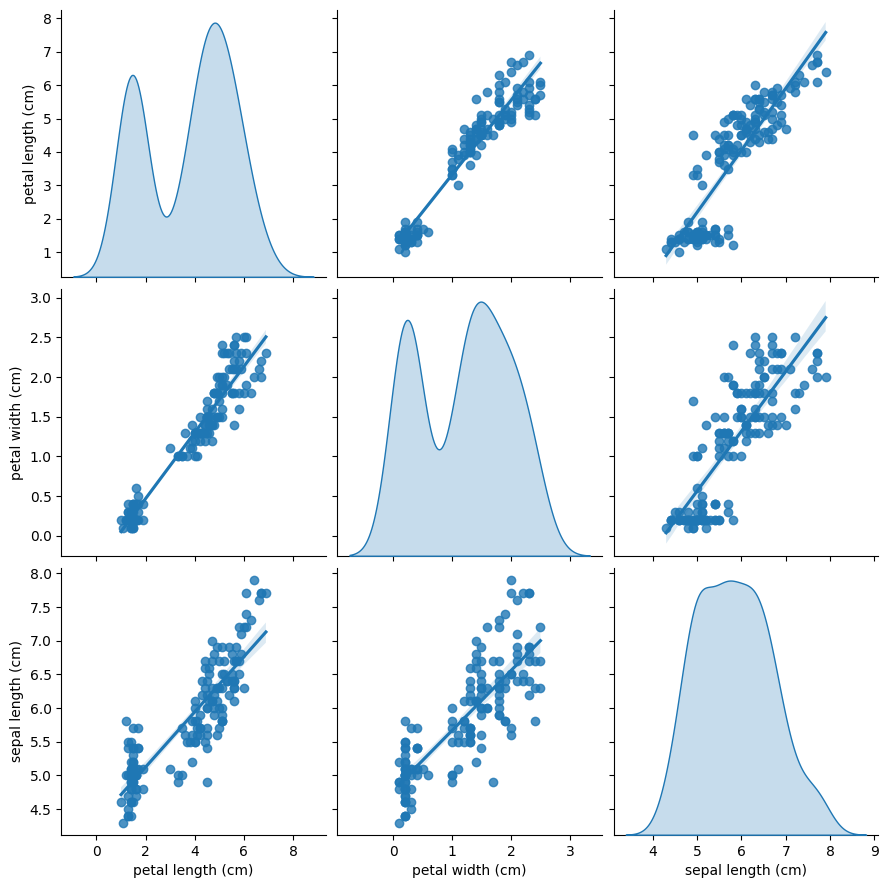

['petal length (cm)', 'petal width (cm)']

In [33]:
plot_features_num_regression(df_iris, target_col="", umbral_corr=0.5)